In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

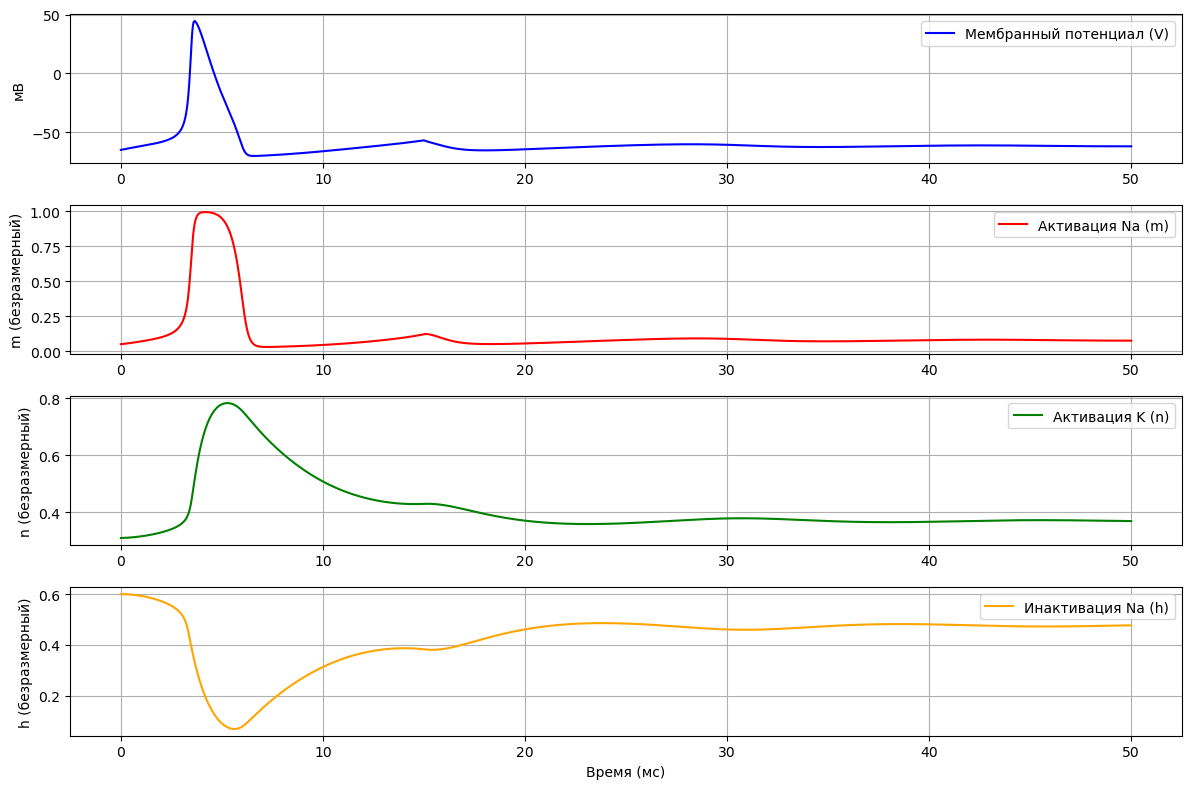

In [3]:
# Параметры модели
C_m = 1.0       # Ёмкость мембраны, мкФ/cm²
g_Na = 120.0    # Проводимость натриевых ионов, мСм/cm²
g_K = 36.0      # Проводимость калиевых ионов, мСм/cm²
g_L = 0.3       # Проводимость утечки, мСм/cm²
E_Na = 55.0     # Равновесный потенциал натрия, мВ
E_K = -72.0     # Равновесный потенциал калия, мВ
E_L = -49.0     # Равновесный потенциал утечки, мВ

# Число временных шагов и шаг по времени
T = 50          # Общее время, мс
dt = 0.01       # Шаг по времени, мс
time = np.arange(0, T + dt, dt)

# Инициализация переменных
V = np.zeros_like(time)       # Мембранный потенциал
n = np.zeros_like(time)       # Активация K
m = np.zeros_like(time)       # Активация Na
h = np.zeros_like(time)       # Инактивация Na

# Начальные условия
V[0] = -65  # Начальный мембранный потенциал, мВ
n[0] = 0.31 # Начальное значение n
m[0] = 0.05 # Начальное значение m
h[0] = 0.6  # Начальное значение h

# Функции для стохастических переменных
def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))

# Моделирование
for t in range(1, len(time)):
    V[t-1] = V[t-1]  # Сохраним предыдущий потенциал для вычислений
    n[t] = n[t-1] + dt * (alpha_n(V[t-1]) * (1 - n[t-1]) - beta_n(V[t-1]) * n[t-1])
    m[t] = m[t-1] + dt * (alpha_m(V[t-1]) * (1 - m[t-1]) - beta_m(V[t-1]) * m[t-1])
    h[t] = h[t-1] + dt * (alpha_h(V[t-1]) * (1 - h[t-1]) - beta_h(V[t-1]) * h[t-1])

    I_ext = 10 if 5 < time[t] < 15 else 0  # Внешний ток (пульсация)
    V[t] = V[t-1] + dt * (1 / C_m) * (
        -g_Na * (m[t-1] ** 3) * h[t-1] * (V[t-1] - E_Na)
        - g_K * (n[t-1] ** 4) * (V[t-1] - E_K)
        - g_L * (V[t-1] - E_L) 
        + I_ext
    )

# Визуализация результатов для всех переменных
plt.figure(figsize=(12, 8))

# График мембранного потенциала
plt.subplot(4, 1, 1)
plt.plot(time, V, label='Мембранный потенциал (V)', color='blue')
plt.ylabel("мВ")
plt.legend()
plt.grid()

# График активации Na (m)
plt.subplot(4, 1, 2)
plt.plot(time, m, label='Активация Na (m)', color='red')
plt.ylabel("m (безразмерный)")
plt.legend()
plt.grid()

# График активации K (n)
plt.subplot(4, 1, 3)
plt.plot(time, n, label='Активация K (n)', color='green')
plt.ylabel("n (безразмерный)")
plt.legend()
plt.grid()

# График инактивации Na (h)
plt.subplot(4, 1, 4)
plt.plot(time, h, label='Инактивация Na (h)', color='orange')
plt.ylabel("h (безразмерный)")
plt.xlabel("Время (мс)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

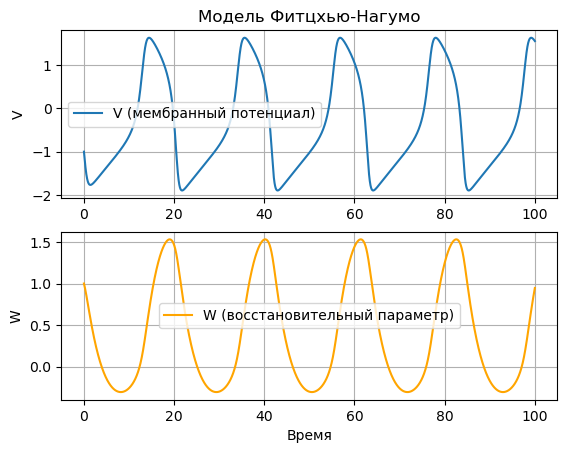

In [10]:
# Параметры модели
a = 0.7
b = 0.8
e=0.2
I = 0.5  
# Начальные условия
V0 = -1
W0 = 1
z = [V0, W0]
def fitzhugh_nagumo(Y, t):
    V, W = Y
    dVdt = V - (V**3) / 3 - W + I
    dWdt = e * (V + a - b * W)
    return [dVdt, dWdt]
# Временные точки для интегрирования
t = np.linspace(0, 100, 10000)

sol = odeint(fitzhugh_nagumo, z, t)
# Потенциал V
plt.subplot(2, 1, 1)
plt.plot(t, sol[:, 0], label='V (мембранный потенциал)')
plt.title('Модель Фитцхью-Нагумо')
plt.ylabel('V')
plt.legend()
plt.grid()

# Параметр W
plt.subplot(2, 1, 2)
plt.plot(t, sol[:, 1], label='W (восстановительный параметр)', color='orange')
plt.xlabel('Время')
plt.ylabel('W')
plt.legend()
plt.grid()


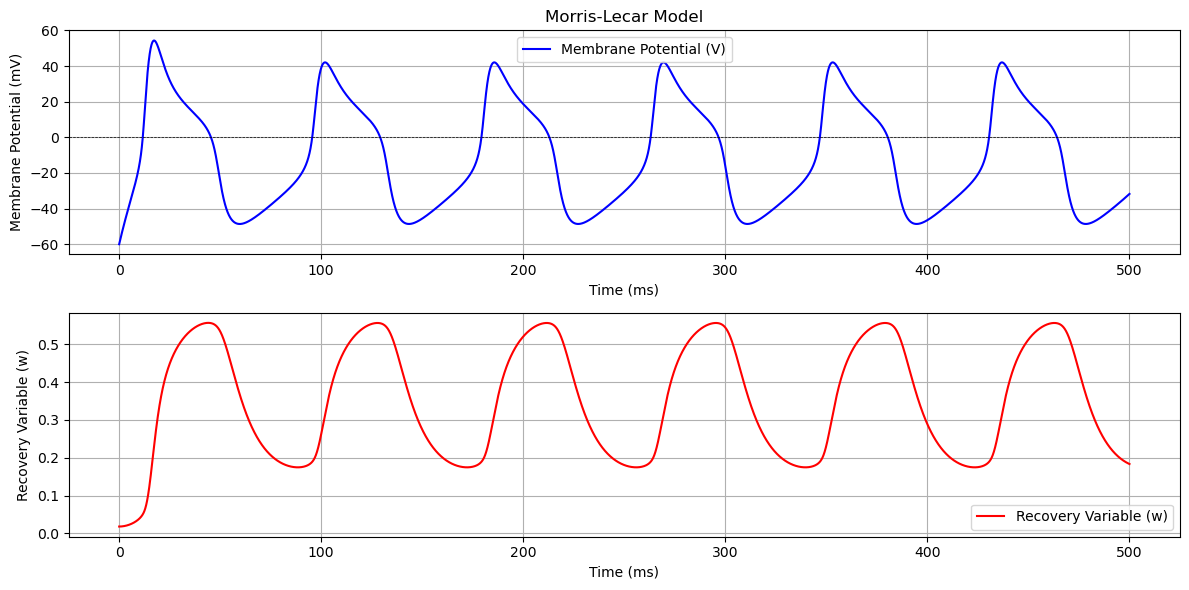

In [17]:
# Constants
C = 20.0    # Membrane capacitance (µF/cm²)
g_Ca = 4.0  # Maximum calcium conductance (mS/cm²)
g_K = 8.0   # Maximum potassium conductance (mS/cm²)
V_Ca = 120.0  # Calcium equilibrium potential (mV)
V_K = -80.0   # Potassium equilibrium potential (mV)
V_L = -60.0   # Leak potential (mV)
phi = 0.04    # Time constant scaling factor
I = 100.0     # Input current (µA/cm²)

# Functions for steady-state values and time constants
def m_infinity(V):
    return 0.5 * (1 + np.tanh((V + 1.2) / 18.0))

def w_infinity(V):
    return 0.5 * (1 + np.tanh(V / 30.0))

def tau_w(V):
    return 1 / (np.cosh(V / 30.0) * 0.5)

# Morris-Lecar model differential equations
def morris_lecar(y, t):
    V, w = y
    dVdt = (I - (g_Ca * m_infinity(V) * (V - V_Ca)) - (g_K * w * (V - V_K)) - (V - V_L)) / C
    dwdt = phi * (w_infinity(V) - w) / tau_w(V)
    return [dVdt, dwdt]

# Initial conditions
V0 = -60.0  # Initial membrane potential
w0 = w_infinity(V0)  # Initial recovery variable
y0 = [V0, w0]

# Time vector
t = np.linspace(0, 500, 10000)  # total time, resolution

# Integrate the Morris-Lecar equations
solution = odeint(morris_lecar, y0, t)
V, w = solution[:, 0], solution[:, 1]

# Plotting results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, V, label='Membrane Potential (V)', color='b')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Morris-Lecar Model')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, w, label='Recovery Variable (w)', color='r')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery Variable (w)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


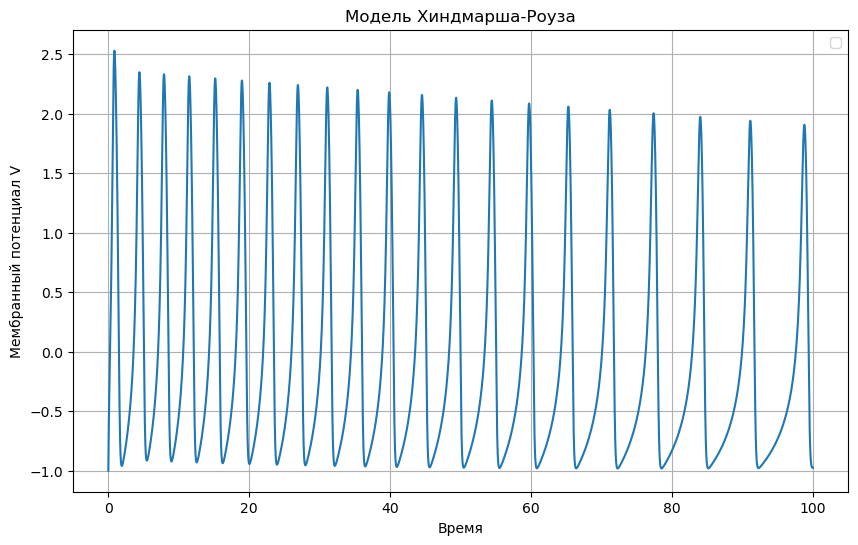

In [18]:
def hindmarsh_rose(y, t, I):
    """
    Система дифференциальных уравнений модели Хиндмарша-Роуза.

    Args:
        y: Массив состояния [x, y, z].
        t: Время.
        I: Внешний ток.

    Returns:
        Массив производных [dx/dt, dy/dt, dz/dt].
    """
    x, y, z = y
    a = 1.0
    b = 3.0
    c = 1.0
    d = 5.0
    r = 0.006
    s = 4.0
    dxdt = y - a*x**3 + b*x**2 - z + I
    dydt = c - d*x**2 - y
    dzdt = r*(s*(x + 1.6) - z)
    return [dxdt, dydt, dzdt]

# Параметры модели
I = 3.29 # Внешний ток (изменяйте для разных режимов)
# I=3.28, I=3.2, I=2.8 - разные типы поведения

# Начальные условия
x0 = -1.0
y0 = 0.0
z0 = 0.0
y0 = [x0, y0, z0]

# Время моделирования
t = np.linspace(0, 100, 10000)  # 100 мс, 10000 точек

# Решение системы уравнений
solution = odeint(hindmarsh_rose, y0, t, args=(I,))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0])
plt.xlabel('Время')
plt.ylabel('Мембранный потенциал V')
plt.title('Модель Хиндмарша-Роуза')
plt.legend()
plt.grid(True)
plt.show()



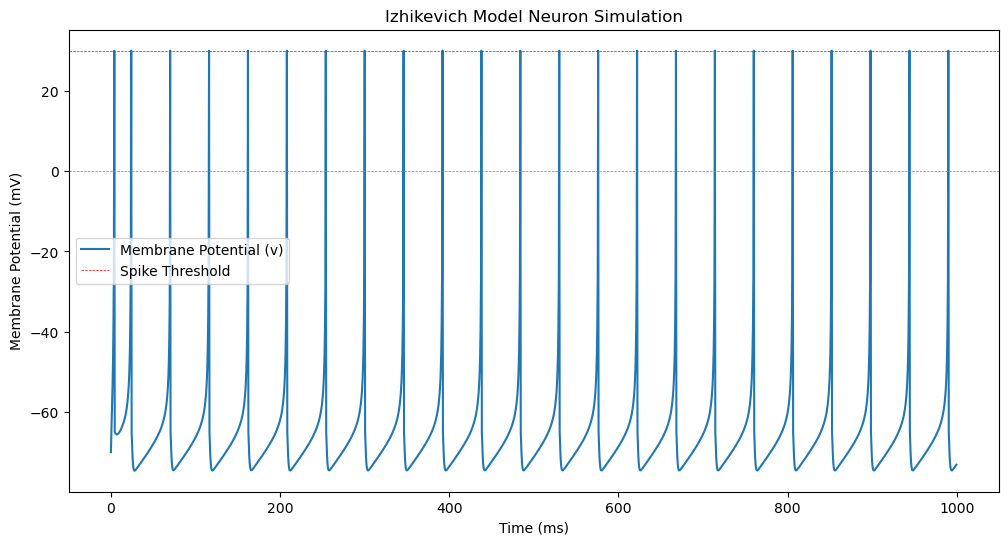

In [21]:

# Параметры модели
a = 0.02  # Время восстановления u
b = 0.2   # Уровень восстановления
c = -65   # Потенциал после спайка
d = 8     # Добавка к u после спайка

# Временные параметры
T = 1000  # Общее время симуляции (мс)
dt = 0.5  # Шаг времени (мс)
time = np.arange(0, T, dt)

# Начальные значения
v = -70  # Начальный мембранный потенциал
u = b * v  # Начальное значение вспомогательной переменной
I_ext = 10  # Внешний ток (постоянный)

# Массивы для хранения значений
V_trace = []
U_trace = []

# Симуляция динамики модели
for t in time:
    V_trace.append(v)
    U_trace.append(u)
    
    # Уравнения модели
    v_prev = v  # Сохраняем предыдущее значение v
    v += dt * (0.04 * v**2 + 5 * v + 140 - u + I_ext)
    u += dt * (a * (b * v_prev - u))
    
    # Условие спайка
    if v >= 30:  # Порог спайка
        V_trace[-1] = 30  # Записываем максимальное значение
        v = c  # Устанавливаем потенциал обратно после спайка
        u += d  # Увеличиваем u

# Визуализация результата
plt.figure(figsize=(12, 6))
plt.plot(time, V_trace, label='Membrane Potential (v)')
plt.title('Izhikevich Model Neuron Simulation')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.axhline(0, color='grey', lw=0.5, ls='--')  # Линия нуля
plt.axhline(30, color='red', lw=0.5, ls='--', label='Spike Threshold')
plt.legend()
plt.show()